# **PCA Size Reduction Analysis**

**PCA is designed for size conversion. In other words, it reduces the size of the data set and allows us to look at it from a different angle. In this way, analysis can be done on less data. PCA is also used for dimension aggregation and getting rid of redundant parts of data dimensions. This will enable us to process the data more easily in line with these operations and to see its dimensions more easily. It will make the work of those operating in the field of distance measurement visibly easier. In addition to the plus features mentioned above, this method also causes data loss. To prevent this, a close reduction in the size can be made. PCA treats the dataset as a complete dataset. Thanks to unsupervised learning, it does not classify the data, only performs the most appropriate size conversion.**

![](https://blog.bioturing.com/wp-content/uploads/2018/11/Blog_pca_6b.png)

**Usage areas of PCA method: ✈**
* Noise Filtering

* Data Visualization

* Attribute Elimination/Conversion

* Attribute Extraction

* Stock Market Analysis
* Health Data

![](https://miro.medium.com/v2/resize:fit:1400/1*ZK4Soly4i2x0Z1ijpxuijA.png)

**As can be seen in the graphic above, dimensions have been reduced from 3-dimensional data to 2-dimensional data. Some data may be lost during this process.**

# **Eigen Value/Eigen Vektor**

**Any matrix multiplied by a one-dimensional matrix and the result should be the one-dimensional matrix multiplied by a factor. If such a result is obtained, the multiplier is the eigenvalue and the matrix is ​​the eigen vector.**

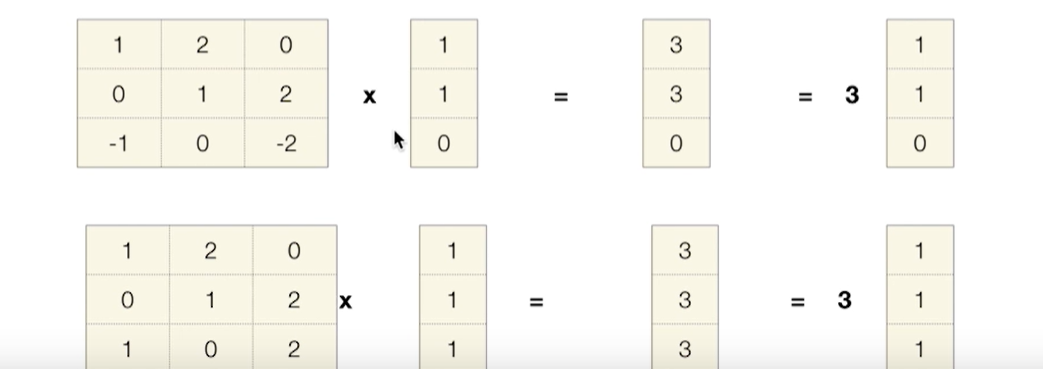

**How Does the PCA Algorithm Work?**

* Step-1: ✈The size (k) to be reduced is determined.

* Step-2: ✈Data is normalized.

* Step-3: ✈The eigenvalue and eigenvector are obtained from the covariance or correlation matrix.

* Step-4: ✈The eigenvalues ​​are sorted from largest to smallest. It is selected as many as k determined in step 1.

* Step-5: ✈The selected k eigenvalue W projection matrix is ​​created.
* Step-6: ✈The original dataset X is transformed using the W matrix. The k-dimensional Y space is obtained.

# **📜1.Import Libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wine-quality/winequalityN.csv


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width",500)

# **📊2.Getting to know the dataset**

In [3]:
df = pd.read_csv('/kaggle/input/wine-quality/winequalityN.csv', low_memory=False)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
def check_dt(dataframe):
    print("SHAPE".center(70, "-"))
    print(dataframe.shape)
    print("TYPE".center(70, "-"))
    print(dataframe.dtypes)
    print("INFO".center(70, "-"))
    print(dataframe.info())
    print("NA".center(70, "-"))
    print(dataframe.isnull().sum())
    print("DESCRIBE".center(70, "-"))
    print(dataframe.describe().T)
    print("NUNIQUE".center(70, "-"))
    print(dataframe.nunique())
check_dt(df)

--------------------------------SHAPE---------------------------------
(6497, 13)
---------------------------------TYPE---------------------------------
type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
---------------------------------INFO---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non

# **🥽3.Data Preprocessing**

**The variable type, which is object with label encoding, is converted to bool type.**

In [5]:
type = df["type"].values
print(type)
type.shape

['white' 'white' 'white' ... 'red' 'red' 'red']


(6497,)

In [6]:
le = preprocessing.LabelEncoder()
type1 = le.fit_transform(df["type"])
type1 = pd.DataFrame(data=type1)
type1.columns=["type1"]
type1

,type1
0,1
1,1
2,1
3,1
4,1
...,...
6492,0
6493,0
6494,0
6495,0


In [7]:
df1=pd.concat([df,type1],axis=1)

In [8]:
df1.drop("type",axis=1,inplace=True)

In [9]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type1
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


**Nan values ​​in the data set during model creation will cause us to get an error. Therefore, the Nan values ​​in the data set are deleted.**

In [10]:
df1.dropna(inplace=True)

In [11]:
df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type1                   0
dtype: int64

**Fragmentation and normalization operations are performed.**

In [12]:
x=df1.iloc[:,0:12].values
x.shape

(6463, 12)

In [13]:
y=df1.iloc[:,-1:].values
y.shape

(6463, 1)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

# **🧨4.Model Creation**

In [16]:
pc=PCA(n_components=2)
X_train1=pc.fit_transform(X_train)
X_test1=pc.transform(X_test)

**The n_components parameter returns the number of variables from which the variables in the data set are reduced.**

**Creating an LR model without PCA**

In [17]:
lr=LogisticRegression()
reg=lr.fit(X_train,y_train)
pred=lr.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Creating an LR model after PCA is done**

In [18]:
reg1=lr.fit(X_train1,y_train)
pred1=lr.predict(X_test1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **🔥5.Confusion Matrix**

In [19]:
print('Actual / Not PCA')
cm=confusion_matrix(y_test,pred)
print(cm)

Actual / Not PCA
[[329   6]
 [  2 956]]


In [20]:
print('Actual / PCA')
cm1=confusion_matrix(y_test,pred1)
print(cm1)

Actual / PCA
[[322  13]
 [ 11 947]]


In [21]:
print("Not PCA / PCA")
cm2=confusion_matrix(pred,pred1)
print(cm2)

Not PCA / PCA
[[324   7]
 [  9 953]]


**As seen in the confusion matrices above, the 3rd confusion matrix gave the confusion matrix of the initial state before the columns were reduced and the PCA applied state. According to this matrix, the number of errors has increased. However, it should be considered that our data set has been reduced from 13 columns to 2 columns. Considering these developments, better results can be obtained by changing the n_components parameter used in model creation.**